In [18]:
#Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Path to CSV files
quartlerly = Path("resources/Quarterly_End_of_Period.csv")
quarterly_eop = Path("resources/Quarterly.csv")

In [3]:
# Read in files.
quarterly_df = pd.read_csv(quartlerly)
quarterly_eop_df = pd.read_csv(quarterly_eop)

In [4]:
# Rename columns and drop rows to make df's the same size
quarterly_df.columns = ['Date', 'Delinquency Rate (% chg)']
quarterly_df.drop(53, inplace=True)

quarterly_eop_df.columns = ['Date', 'GDP (% chg)', 'Finance Rate (% chg)', 'Avg Amount Financed (% chg)']
quarterly_eop_df.drop([53, 54], inplace=True)

In [5]:
# Merge df's
auto_df = pd.merge(quarterly_df, quarterly_eop_df, on='Date', how='inner')

# Reorder columns in auto_df
auto_df = auto_df[['Date', 'GDP (% chg)', 'Finance Rate (% chg)', 'Avg Amount Financed (% chg)', 'Delinquency Rate (% chg)']]

# Ran into many graphing problems so I changed from objects to numbers (float64) and change date into dateteime
auto_df[['Finance Rate (% chg)', 'Avg Amount Financed (% chg)']] = auto_df[['Finance Rate (% chg)', 'Avg Amount Financed (% chg)']].apply(pd.to_numeric, errors='coerce')
auto_df['Date'] = pd.to_datetime(auto_df['Date'])
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         53 non-null     datetime64[ns]
 1   GDP (% chg)                  53 non-null     float64       
 2   Finance Rate (% chg)         53 non-null     float64       
 3   Avg Amount Financed (% chg)  53 non-null     float64       
 4   Delinquency Rate (% chg)     53 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.2 KB


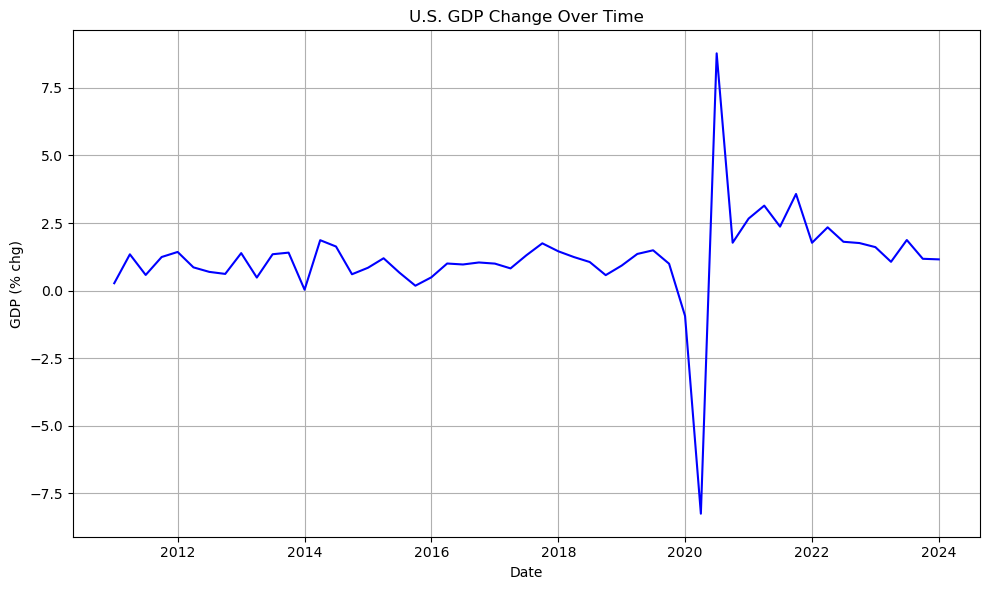

In [48]:
# U.S. GDP Change Over Time
plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['GDP (% chg)'], color='blue', label='GDP (% chg)')
plt.title('U.S. GDP Change Over Time')
plt.xlabel('Date')
plt.ylabel('GDP (% chg)')
plt.grid()
plt.tight_layout()
plt.show()

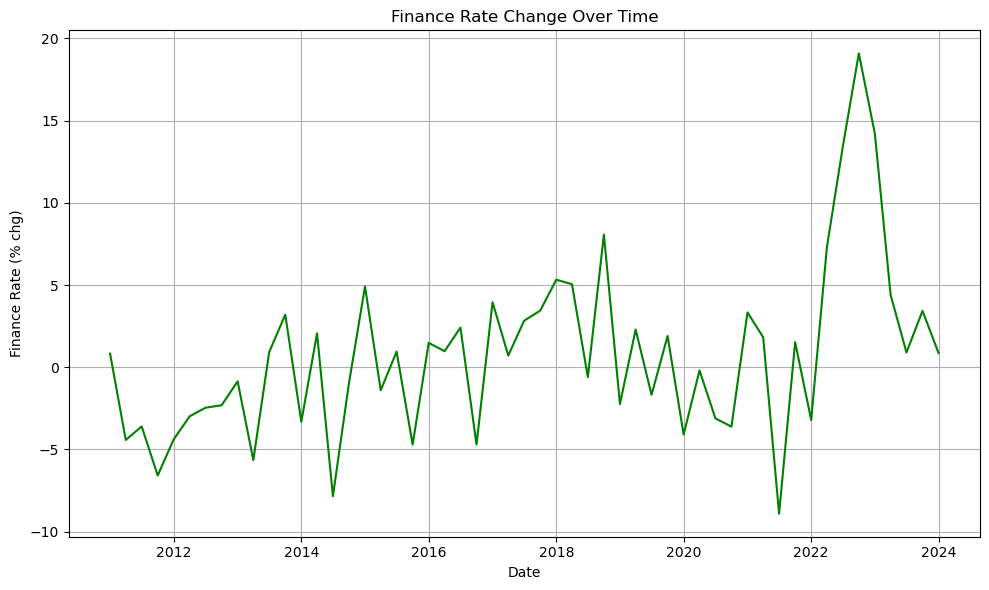

In [51]:
# Finance Rate Change Over Time
plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['Finance Rate (% chg)'], linestyle='-', color='green', label='Finance Rate (% chg)')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Finance Rate Change Over Time')
plt.xlabel('Date')
plt.ylabel('Finance Rate (% chg)')
plt.grid()
plt.tight_layout()
plt.show()

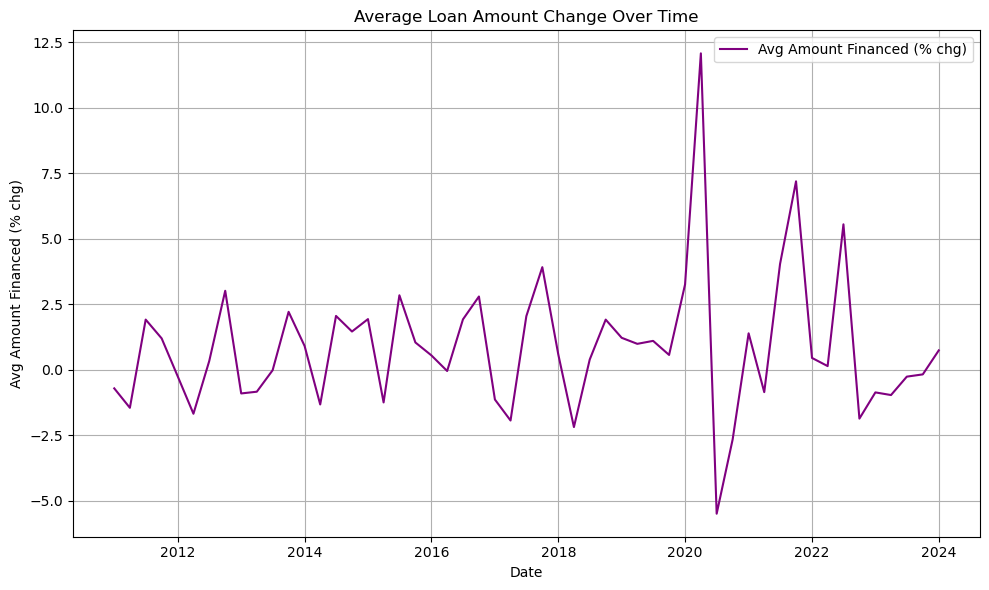

In [31]:
# Average Loan Amount Change Over Time
plt.figure(figsize=(10,6))
plt.plot(auto_df['Date'], auto_df['Avg Amount Financed (% chg)'], color='purple', label='Avg Amount Financed (% chg)')

plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)  # -- Any graph with this is because the yaxis values were being shown in scientific notation and it turned them into straight lines. This changes it back to full numbers

plt.title('Average Loan Amount Change Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Amount Financed (% chg)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

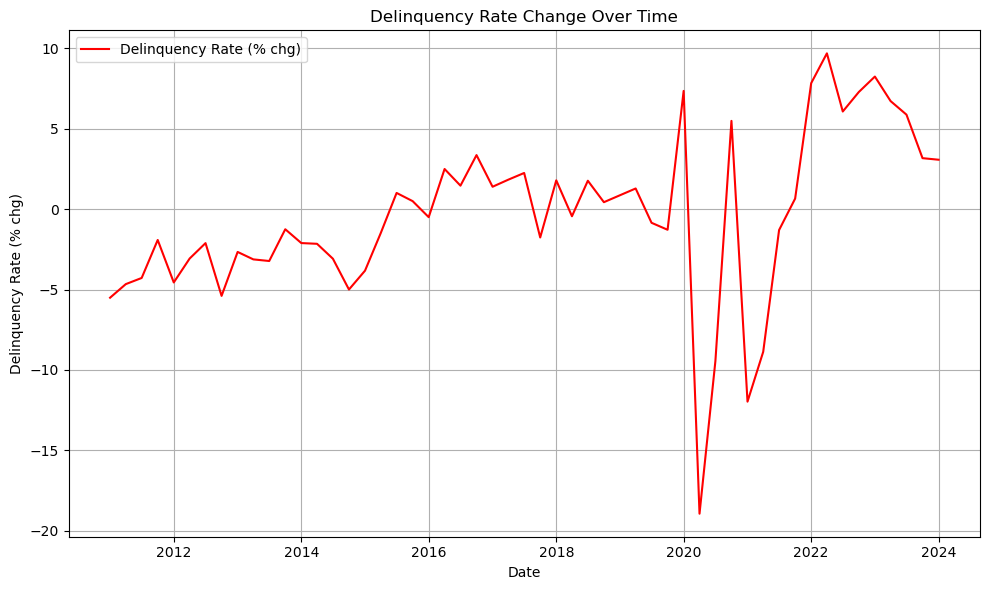

In [32]:
# Delinquency Rate Change Over Time
plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['Delinquency Rate (% chg)'], color='red', label='Delinquency Rate (% chg)')
plt.title('Delinquency Rate Change Over Time')
plt.xlabel('Date')
plt.ylabel('Delinquency Rate (% chg)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

R-value between GDP and Delinquency Rate: 0.20 and the P-Value is: 0.14383520198078084


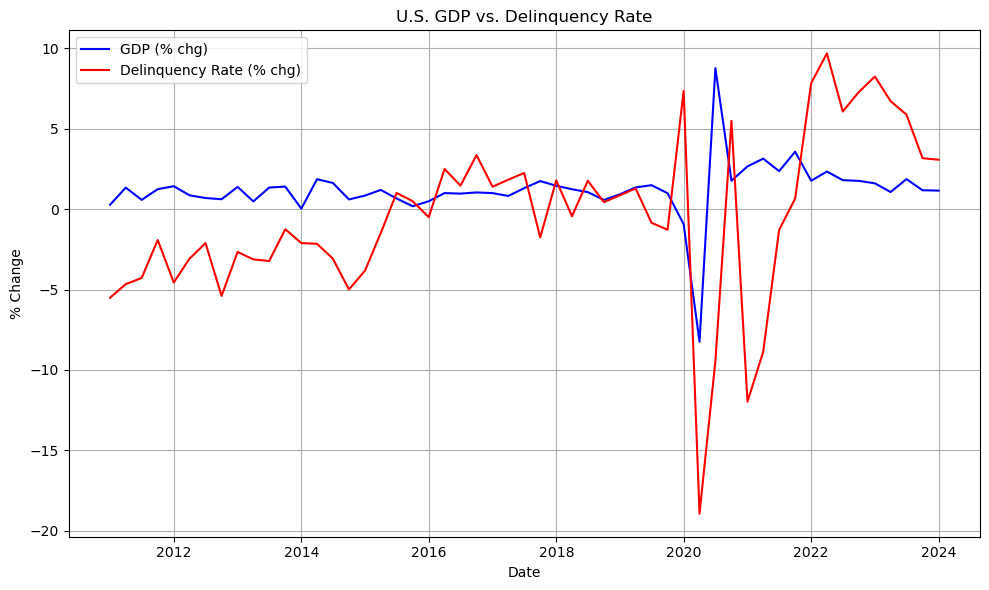

In [53]:
# GDP vs. Delinquency Rate
r_gdp_delinquency, p_gdp_delinquency = pearsonr(auto_df['GDP (% chg)'], auto_df['Delinquency Rate (% chg)'])
print(f"R-value between GDP and Delinquency Rate: {r_gdp_delinquency:.2f} and the P-Value is: {p_gdp_delinquency}")

plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['GDP (% chg)'], label='GDP (% chg)', color='blue')
plt.plot(auto_df['Date'], auto_df['Delinquency Rate (% chg)'], label='Delinquency Rate (% chg)', color='red')
plt.title('U.S. GDP vs. Delinquency Rate')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

R-value between GDP and Avg Amount Financed: -0.58 and the P-Value is: 6.218982512697506e-06


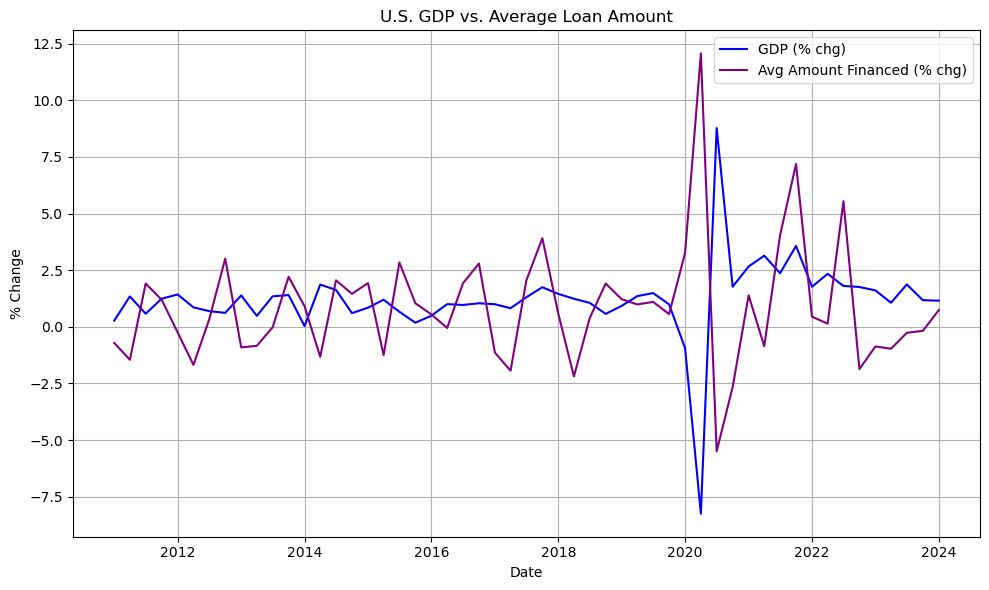

In [54]:
# GDP vs. Avg Amount Financed
r_gdp_loan, p_gdp_loan = pearsonr(auto_df['GDP (% chg)'], auto_df['Avg Amount Financed (% chg)'])
print(f"R-value between GDP and Avg Amount Financed: {r_gdp_loan:.2f} and the P-Value is: {p_gdp_loan}")

plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['GDP (% chg)'], label='GDP (% chg)', color='blue')
plt.plot(auto_df['Date'], auto_df['Avg Amount Financed (% chg)'], label='Avg Amount Financed (% chg)', color='purple')
plt.title('U.S. GDP vs. Average Loan Amount')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

R-value between Finance Rate and Avg Amount Financed: -0.03 and the P-Value is: 0.8297584015240713


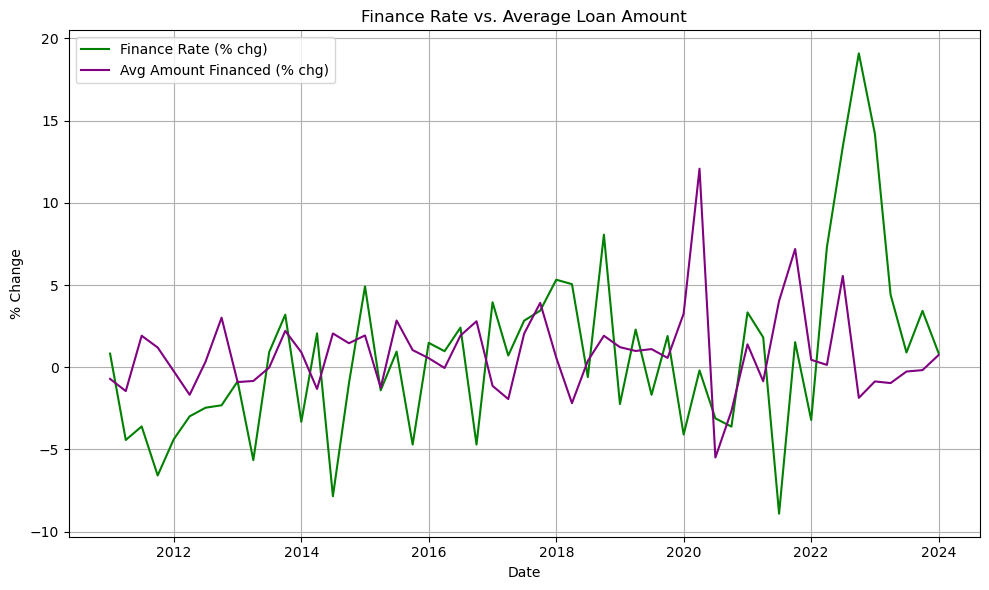

In [55]:
#Finance Rate vs. Average Loan Amount
r_finance_loan, p_finance_loan = pearsonr(auto_df['Finance Rate (% chg)'], auto_df['Avg Amount Financed (% chg)'])
print(f"R-value between Finance Rate and Avg Amount Financed: {r_finance_loan:.2f} and the P-Value is: {p_finance_loan}")

plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['Finance Rate (% chg)'], label='Finance Rate (% chg)', color='green')
plt.plot(auto_df['Date'], auto_df['Avg Amount Financed (% chg)'], label='Avg Amount Financed (% chg)', color='purple')
plt.title('Finance Rate vs. Average Loan Amount')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

R-value between GDP and Finance Rate: 0.05 and the P-Value is: 0.7028415831422917


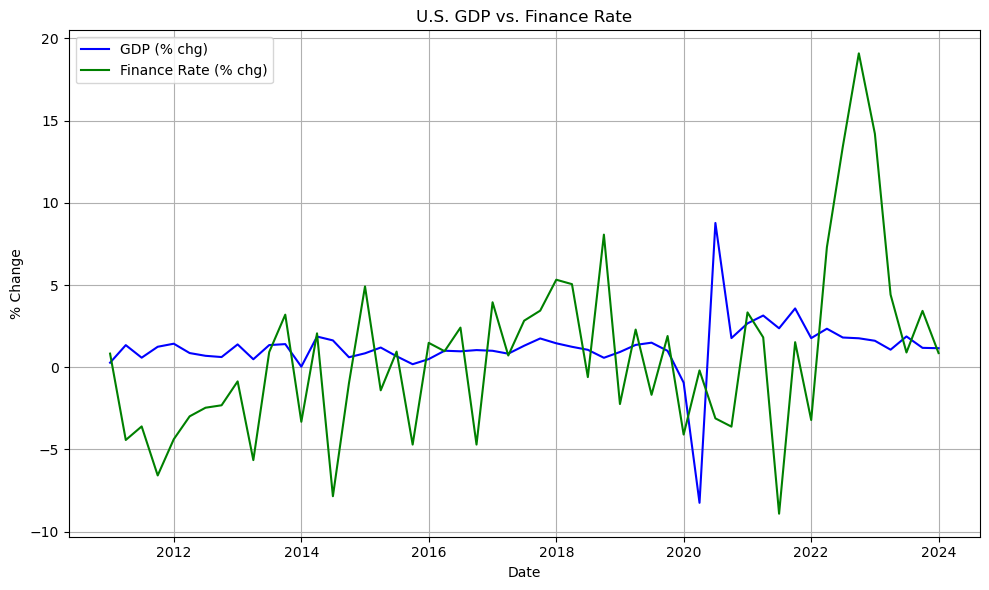

In [56]:
# GDP vs. Finance Rate over time
r_gdp_finance, p_gdp_finance = pearsonr(auto_df['GDP (% chg)'], auto_df['Finance Rate (% chg)'])
print(f"R-value between GDP and Finance Rate: {r_gdp_finance:.2f} and the P-Value is: {p_gdp_finance}")

plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['GDP (% chg)'], label='GDP (% chg)', color='blue')
plt.plot(auto_df['Date'], auto_df['Finance Rate (% chg)'], label='Finance Rate (% chg)', color='green')
plt.title('U.S. GDP vs. Finance Rate')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

R-value between Finance Rate and Delinquency Rate: 0.36 and the P-Value is: 0.008917635687704735


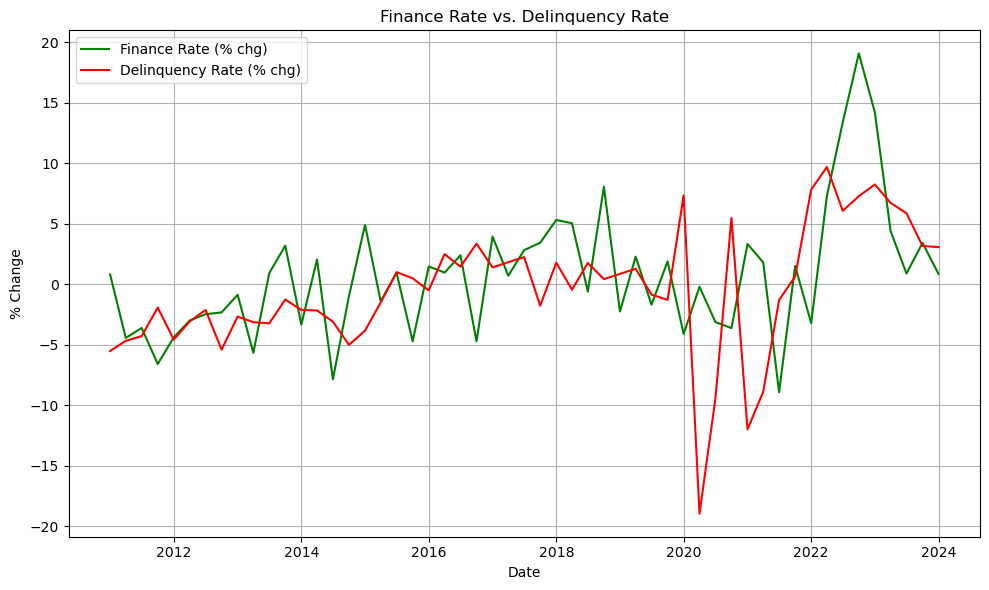

In [57]:
# Finance Rate vs Delinquency rate
r_finance_delinquency, p_finance_delinquency = pearsonr(auto_df['Finance Rate (% chg)'], auto_df['Delinquency Rate (% chg)'])
print(f"R-value between Finance Rate and Delinquency Rate: {r_finance_delinquency:.2f} and the P-Value is: {p_finance_delinquency}")

plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['Finance Rate (% chg)'], label='Finance Rate (% chg)', color='green')
plt.plot(auto_df['Date'], auto_df['Delinquency Rate (% chg)'], label='Delinquency Rate (% chg)', color='red')
plt.title('Finance Rate vs. Delinquency Rate')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

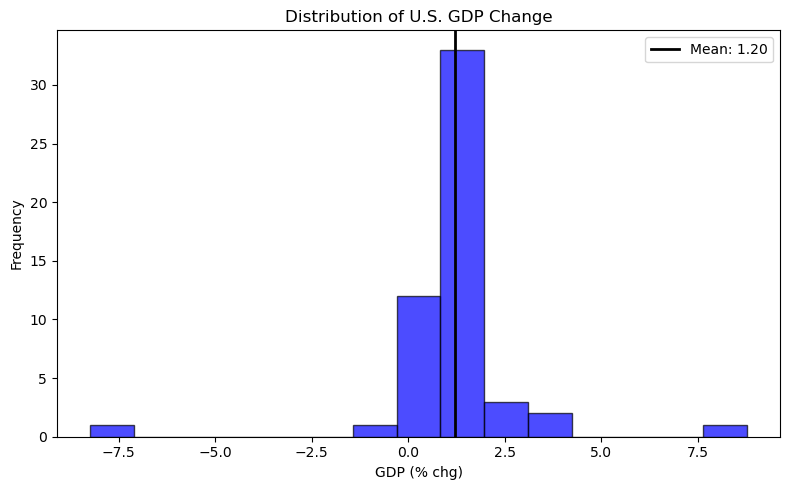

In [47]:
# Distribution of GDP Changesgdp_mean = auto_df['GDP (% chg)'].mean()
gdp_median = auto_df['GDP (% chg)'].median()

plt.figure(figsize=(8, 5))
plt.hist(auto_df['GDP (% chg)'], bins=15, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(gdp_mean, color='black', linewidth=2.0, label=f'Mean: {gdp_mean:.2f}')
plt.title('Distribution of U.S. GDP Change')
plt.xlabel('GDP (% chg)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

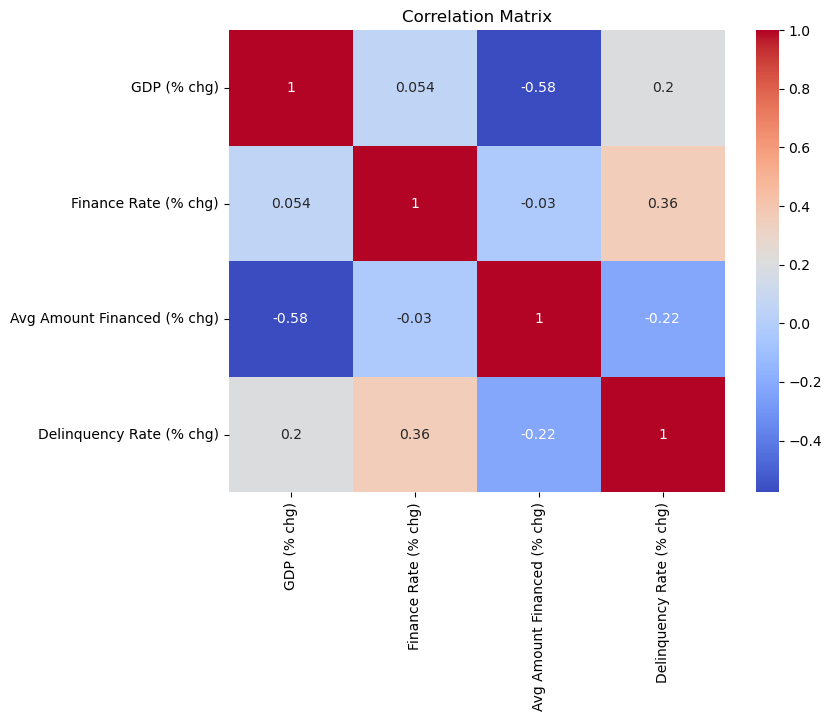

In [13]:
#Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(auto_df[['GDP (% chg)', 'Finance Rate (% chg)', 'Avg Amount Financed (% chg)', 'Delinquency Rate (% chg)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
